before you 
```
$ go : cd $GOPATH/notebookUtils
$ go build
```

### 1. import libraries

In [1]:

import "fmt"
import "gonum.org/v1/gonum/blas/blas64"
import "gonum.org/v1/gonum/mat"
import "gonum.org/v1/gonum/stat"
import "gonum.org/v1/plot"
import "gonum.org/v1/plot/plotter"
import "gonum.org/v1/plot/plotutil"
import "gonum.org/v1/plot/vg"
import "strings"
import "strconv"
import "github.com/kniren/gota/dataframe"
import "os"
import "encoding/csv"
import "github.com/kniren/gota/series"
import "math"
import "image/color"
import "training-ai/notebookUtils"

#### 2. Load working csv file

this time we use the utils created for this effect in training-ai/notebookUtils

In [2]:
file, err := os.Open("../data/basketball.heigh.and.weigh.csv")

In [3]:
fmt.Println(err)

<nil>


6 <nil>

In [4]:
dataset := dataframe.ReadCSV(file)

In [5]:
file.Close()

In [6]:
fmt.Println(dataset)

[1034x6] DataFrame

    Name            Team     Position       Height(inches) Weight(pounds) ...
 0: Adam_Donachie   BAL      Catcher        74             180            ...
 1: Paul_Bako       BAL      Catcher        74             215            ...
 2: Ramon_Hernandez BAL      Catcher        72             210            ...
 3: Kevin_Millar    BAL      First_Baseman  72             210            ...
 4: Chris_Gomez     BAL      First_Baseman  73             188            ...
 5: Brian_Roberts   BAL      Second_Baseman 69             176            ...
 6: Miguel_Tejada   BAL      Shortstop      69             209            ...
 7: Melvin_Mora     BAL      Third_Baseman  71             200            ...
 8: Aubrey_Huff     BAL      Third_Baseman  76             231            ...
 9: Adam_Stern      BAL      Outfielder     71             180            ...
    ...             ...      ...            ...            ...            ...
    <string>        <string> <string>       

1061 <nil>

### We can select one or many columns of a dataFrame :

In [7]:
fmt.Println(dataset.Col("Team"))

[BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL BAL CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS CWS ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA ANA BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS BOS CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE CLE OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK OAK NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY NYY DET DET DET DET DET DET DET

3970 <nil>

In [8]:
fmt.Println(dataset.Select([]string{"Name","Position"}))

[1034x2] DataFrame

    Name            Position      
 0: Adam_Donachie   Catcher       
 1: Paul_Bako       Catcher       
 2: Ramon_Hernandez Catcher       
 3: Kevin_Millar    First_Baseman 
 4: Chris_Gomez     First_Baseman 
 5: Brian_Roberts   Second_Baseman
 6: Miguel_Tejada   Shortstop     
 7: Melvin_Mora     Third_Baseman 
 8: Aubrey_Huff     Third_Baseman 
 9: Adam_Stern      Outfielder    
    ...             ...           
    <string>        <string>      



476 <nil>

##### select name, position and heigt for the Chicago White Sox 

In [9]:
filter := dataframe.F{
    Colname:    "Team",
    Comparator: series.Eq,
    Comparando: "CWS",
}

In [10]:
fmt.Println(dataset.Filter(filter).Select([]string{"Name","Position","Weight(pounds)"}))

[33x3] DataFrame

    Name              Position       Weight(pounds)
 0: A.J._Pierzynski   Catcher        245           
 1: Toby_Hall         Catcher        240           
 2: Paul_Konerko      First_Baseman  215           
 3: Tadahito_Iguchi   Second_Baseman 185           
 4: Juan_Uribe        Shortstop      175           
 5: Alex_Cintron      Shortstop      199           
 6: Joe_Crede         Third_Baseman  200           
 7: Josh_Fields       Third_Baseman  215           
 8: Ryan_Sweeney      Outfielder     200           
 9: Brian_N._Anderson Outfielder     205           
    ...               ...            ...           
    <string>          <string>       <int>         



695 <nil>

### Find the average width and heigh by team

find all teams (no duplicated)

In [11]:
teams :=dataset.Col("Team").Records()

In [12]:
teamsMap := make(map[string]string)
for _,val := range teams {
    teamsMap[val]=val
}

In [13]:
fmt.Println(teamsMap)

map[SEA:SEA HOU:HOU MLW:MLW OAK:OAK ARZ:ARZ PIT:PIT BAL:BAL NYY:NYY TB:TB MIN:MIN CIN:CIN CWS:CWS ATL:ATL COL:COL STL:STL BOS:BOS TEX:TEX LA:LA SF:SF ANA:ANA DET:DET NYM:NYM KC:KC PHI:PHI SD:SD WAS:WAS CLE:CLE TOR:TOR CHC:CHC FLA:FLA]


235 <nil>

For each team, find the average 

In [14]:
for key :=range teamsMap{
    filter := dataframe.F{
    Colname:    "Team",
    Comparator: series.Eq,
    Comparando: key,
}
    fmt.Println(key, stat.Mean(dataset.Filter(filter).Col("Weight(pounds)").Float(),nil),stat.Mean(dataset.Filter(filter).Col("Height(inches)").Float(),nil) )
}

CLE 201.65714285714284 74.08571428571429
TOR 203.85294117647058 73.88235294117646
CHC 204.13888888888889 74.13888888888889
FLA 202.375 73.9375
SEA 198.6764705882353 73.58823529411765
HOU 198.05882352941177 72.97058823529412
MLW 205.28571428571428 73.6
OAK 198.97297297297297 73.27027027027027
ARZ 208.07142857142858 73.67857142857143
PIT 204.37142857142857 73.6
BAL 196.34285714285716 73.48571428571428
NYY 208.3125 74.34375
TB 197.45454545454547 73.6969696969697
MIN 201.1818181818182 73.0909090909091
CIN NaN 73.66666666666667
CWS 210.5151515151515 74.63636363636364
ATL 199.51351351351352 73.83783783783784
COL 198.37142857142857 73.94285714285714
STL 201.625 73.625
BOS 204.83333333333334 74.22222222222223
TEX 202.6 74.08571428571429
LA 203.87878787878788 73.36363636363636
SF 202.7941176470588 73.55882352941177
ANA 201.0857142857143 73.34285714285714
DET 203.83783783783784 73.70270270270271
NYM 197.21052631578948 72.94736842105263
KC 195.9142857142857 73.51428571428572
PHI 195.1944444444444

#### Visualize the relationship between width and heigh

In [15]:
plotGrid, err := plot.New()

In [16]:
fmt.Println(err)

<nil>


6 <nil>

In [17]:
plotGrid.Title.Text = "relationship between width and heigh"
plotGrid.Y.Label.Text = "Weight"
plotGrid.X.Label.Text = "Height"

In [18]:
plotGrid.Add(plotter.NewGrid())

In [19]:

widthsHeighs := dataset.Select([]string{"Height(inches)","Weight(pounds)"})


In [20]:
fmt.Println(widthsHeighs)

[1034x2] DataFrame

    Height(inches) Weight(pounds)
 0: 74             180           
 1: 74             215           
 2: 72             210           
 3: 72             210           
 4: 73             188           
 5: 69             176           
 6: 69             209           
 7: 71             200           
 8: 76             231           
 9: 71             180           
    ...            ...           
    <int>          <int>         



463 <nil>

In [21]:
ptsPlot := make(plotter.XYs, widthsHeighs.Nrow())
for i,val := range ptsPlot {
    ptsPlot[i].X = widthsHeighs.Elem(i,0).Float()
    ptsPlot[i].Y = widthsHeighs.Elem(i,1).Float()
    if widthsHeighs.Elem(i,0).IsNA() {
        ptsPlot[i].X = 0
    }
    if widthsHeighs.Elem(i,1).IsNA() {
        ptsPlot[i].Y = 0
    }
}

In [22]:
    fmt.Println(ptsPlot)

[{74 180} {74 215} {72 210} {72 210} {73 188} {69 176} {69 209} {71 200} {76 231} {71 180} {73 188} {73 180} {74 185} {74 160} {69 180} {70 185} {72 197} {73 189} {75 185} {78 219} {79 230} {76 205} {74 230} {76 195} {72 180} {71 192} {75 225} {77 203} {74 195} {73 182} {74 188} {78 200} {73 180} {75 200} {73 200} {75 245} {75 240} {74 215} {69 185} {71 175} {74 199} {73 200} {73 215} {76 200} {74 205} {74 206} {70 186} {72 188} {77 220} {74 210} {70 195} {76 244} {75 195} {73 200} {75 200} {76 212} {76 224} {78 210} {74 205} {74 220} {76 195} {77 200} {81 260} {78 228} {75 270} {77 200} {75 210} {76 190} {74 220} {72 180} {72 205} {75 210} {73 220} {73 211} {73 200} {70 180} {70 190} {70 170} {76 230} {68 155} {71 185} {72 185} {75 200} {75 225} {75 225} {75 220} {68 160} {74 205} {78 235} {71 250} {73 210} {76 190} {74 160} {74 200} {79 205} {75 222} {73 195} {76 205} {74 220} {74 220} {73 170} {72 185} {74 195} {73 220} {74 230} {72 180} {73 220} {69 180} {72 180} {73 170} {75 210} 

9306 <nil>

In [23]:
s, err := plotter.NewScatter(ptsPlot)

In [24]:
fmt.Println(err)

<nil>


6 <nil>

In [25]:
s.GlyphStyle.Color = color.RGBA{R: 255, B: 128, A: 255}

In [26]:
plotGrid.Add(s)

In [27]:
if err := plotGrid.Save(4*vg.Inch, 4*vg.Inch, "wvsh1.png"); err != nil {
		panic(err)
}


In [28]:
graph1, err :=notebookUtils.GetGraph("wvsh1.png")

In [29]:
fmt.Println(err)

<nil>


6 <nil>

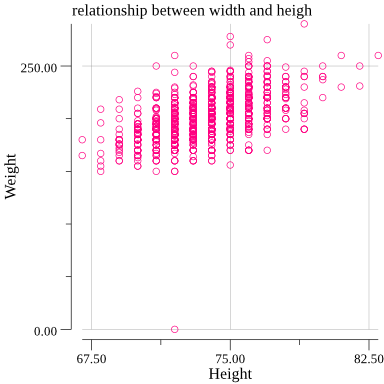

In [30]:
display.PNG(graph1)

now we are going to transpose the string matrix. this time we use the utils created for this effect in training-ai/notebookUtils

Now we are going to take only the information we would like to analyse: attacker size, deffender size, attacker outcome and summer
